In [13]:
import sklearn
print(sklearn.__version__)

1.2.0


In [1]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
  #fit( ) 메소드는 아무것도 학습하지 않음
  def fit(self, X, y=None):
    pass

#predict 함수는 Sex피처가 1이면 0 그렇지 않으면 1로 예측함.
  def predict (self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i]== 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df
  
#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

#Data Preprocessing 호출
def transform_feature(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터 재 로딩, 데이터 가공, 학습데이터/테스트데이터 분할
titanic_df = pd.read_csv('./data_set/titanic_train.csv')
y_df = titanic_df['Survived']
x_df = titanic_df.drop('Survived', axis=1)
x_df = transform_feature(x_df)

X_train,X_test, y_train, y_test = train_test_split(x_df,y_df, test_size=0.2, random_state=44)

#더미 분류기를 이용하여 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(f'Dummy Classification의 정확도는 {accuracy_score(y_test, mypredictions):.4f}')

Dummy Classification의 정확도는 0.7263


In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [5]:
class MyFakeClassifier (BaseEstimator):
  def fit(self, X, y):
    pass
  
  #입력값으로 들어오는 X데이터셋의 크기만큼 모두 0값으로 만들어서 반환
  def predict (self, X):
    return np.zeros((len(X), 1), dtype=bool)
  

digits = load_digits()

print(digits.data)
print('### digits data shape', digits.data.shape)
print(digits.target)
print('### digits target shape', digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits data shape (1797, 64)
[0 1 2 ... 8 9 8]
### digits target shape (1797,)


In [6]:
digits.target ==2

array([False, False,  True, ..., False, False, False])

In [7]:
#digit의 번호가 7이면 True이고 이를 1로 변환, 아니면 0
y=(digits.target==7).astype(int)

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=44)

In [8]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#더미 분류기로 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

print(f'모든 예측을 0으로 해도 정확도는 {accuracy_score(y_test, fakepred):.4f}')

레이블 테스트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    411
1     39
dtype: int64
모든 예측을 0으로 해도 정확도는 0.9133


### 오차행렬 (Confusion Matrix)

In [9]:
from sklearn.metrics import confusion_matrix 

#실제와 가짜 예측결과의 confusion 매트릭스 출력
confusion_matrix(y_test, fakepred)

array([[411,   0],
       [ 39,   0]], dtype=int64)

### 정밀도와 재현율

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'정밀도 : {precision_score(y_test, fakepred)}')
print(f'재현율 : {recall_score(y_test, fakepred)}')

정밀도 : 0.0
재현율 : 0.0


c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  print('오차행렬')
  print(confusion)
  print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}')

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본데이터 로딩, 데이터 분할
titanic_df = pd.read_csv('./data_set/titanic_train.csv')
y_df = titanic_df['Survived']
x_df = titanic_df.drop('Survived', axis=1)
x_df = transform_feature(x_df)


X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=44)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

오차행렬
[[81 25]
 [22 51]]
정확도 : 0.7374, 정밀도 : 0.6711, 재현율 : 0.6986


c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Precision / Recall Trade-Off

In [22]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba() 결과 shape : {pred_proba.shape}')
print(f'pred_proba 배열에서 앞 3개만 추출 \n {pred_proba[:3]}')

#예측확율 array와 예측 결과값 array를 concat하여 한번에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print(f'두개의 class중에서 더 큰 확률을 클래스 값으로 예측 \n {pred_proba_result[:3]}' )


pred_proba() 결과 shape : (179, 2)
pred_proba 배열에서 앞 3개만 추출 
 [[0.86288137 0.13711863]
 [0.85831172 0.14168828]
 [0.46340686 0.53659314]]
두개의 class중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.86288137 0.13711863 0.        ]
 [0.85831172 0.14168828 0.        ]
 [0.46340686 0.53659314 1.        ]]


#### Binarizer 활용

In [23]:
from sklearn.preprocessing import Binarizer
X = [[1, -1, 2],
    [2, 0 , 0 ],
    [0, 1.1, 1.2]]

#threshild 기준값 보다 같거나 작으면 0을 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### 분류 결정 임계값 0.5기반에서 Binarizer를 이용하여 예측값 변화

In [24]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold임계값 설정
custom_threshold=0.5

#predict_proba() 반환값의 두번째 컬럼, 즉 Positive클래스 컬럼만 추출하여 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[81 25]
 [22 51]]
정확도 : 0.7374, 정밀도 : 0.6711, 재현율 : 0.6986


#### 분류 결정 임계값 0.4기반에서 Binarizer를 이용하여 예측값 변화

In [25]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold임계값 설정
custom_threshold=0.4

#predict_proba() 반환값의 두번째 컬럼, 즉 Positive클래스 컬럼만 추출하여 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[76 30]
 [20 53]]
정확도 : 0.7207, 정밀도 : 0.6386, 재현율 : 0.7260


### 여러개의 분류 결정 임계값을 적용하여 예측값 변화 확인

In [26]:
#임계값을 리스트 객체
thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임계값 : ', custom_threshold)

    get_clf_eval(y_test, custom_predict)


get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임계값 :  0.4
오차행렬
[[76 30]
 [20 53]]
정확도 : 0.7207, 정밀도 : 0.6386, 재현율 : 0.7260
임계값 :  0.45
오차행렬
[[80 26]
 [21 52]]
정확도 : 0.7374, 정밀도 : 0.6667, 재현율 : 0.7123
임계값 :  0.5
오차행렬
[[81 25]
 [22 51]]
정확도 : 0.7374, 정밀도 : 0.6711, 재현율 : 0.6986
임계값 :  0.55
오차행렬
[[85 21]
 [24 49]]
정확도 : 0.7486, 정밀도 : 0.7000, 재현율 : 0.6712
임계값 :  0.6
오차행렬
[[89 17]
 [26 47]]
정확도 : 0.7598, 정밀도 : 0.7344, 재현율 : 0.6438


### Precision_recall_curve를 이용하여 임계값에 다른 정밀도-재현율 값 추출

In [27]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때 예측 확률 추측
pred_proba_class_1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일 때의 예측확률을 precision_recall_curve의 인자로 활용
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_1)
print('반환된 분류 결정 임계값 배열의 Shape', thresholds.shape)
print('반환된 precisions 임계값 배열의 Shape', precisions.shape)
print('반환된 recalls 임계값 배열의 Shape', recalls.shape)

print('threshold 5 sample : ', thresholds[:5])
print('precisions 5 sample : ', precisions[:5])
print('recalls 5 sample : ', recalls[:5])


thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 인덱스 10개 : ', thr_index)
print('샘플용 10개의 임계값 : ', np.round(thresholds[thr_index], 2))

#15스텝 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값 별 정밀도 : ', np.round(precisions[thr_index], 3))
print('샘플 임계값 별 재현율 : ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임계값 배열의 Shape (173,)
반환된 precisions 임계값 배열의 Shape (174,)
반환된 recalls 임계값 배열의 Shape (174,)
threshold 5 sample :  [0.02368489 0.03134684 0.04356736 0.04404525 0.04647915]
precisions 5 sample :  [0.40782123 0.41011236 0.41242938 0.41477273 0.41714286]
recalls 5 sample :  [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 인덱스 10개 :  [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임계값 :  [0.02 0.07 0.09 0.11 0.15 0.21 0.38 0.56 0.66 0.73 0.88 0.95]
샘플 임계값 별 정밀도 :  [0.408 0.433 0.446 0.477 0.522 0.58  0.631 0.71  0.811 0.895 0.957 0.875]
샘플 임계값 별 재현율 :  [1.    0.973 0.904 0.863 0.822 0.795 0.726 0.671 0.589 0.466 0.301 0.096]


### 임계값의 변경에 따른 정밀도 - 재현율 변화 곡선

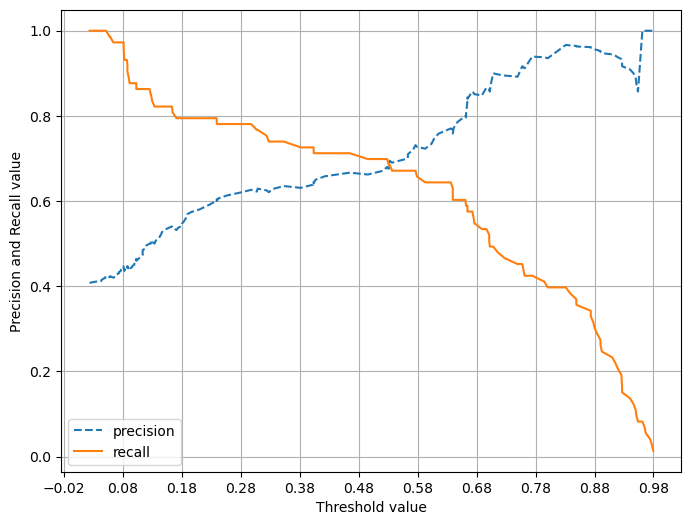

In [29]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_c1):
  #threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
  
  plt.figure(figsize=(8,6))
  threshold_boundray = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boundray], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boundray], label='recall')

  #threshold 값 X축의 Scale을 0.1 단위로 변경
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  # x축, y축 label과 legend, 그리고 gird설정
  plt.xlabel('Threshold value')
  plt.ylabel('Precision and Recall value')
  plt.legend()
  plt.grid()
  plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

### F1 socre

In [32]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 스코어 : {f1 :.4f}')

F1 스코어 : 0.6846


In [47]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)

  #f1스코어 추가
  f1 = f1_score(y_test, pred)
  print('오차행렬')
  print(confusion)
  print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, f1스코어 {f1:.4f}')
  

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[81 25]
 [22 51]]
정확도 : 0.7374, 정밀도 : 0.6711, 재현율 : 0.6986, f1스코어 0.6846


### ROC CURVE와 AUC

In [34]:
from sklearn.metrics import roc_curve

#roc_curve는 FPR (거짓,참 비율), TPR(참,참 비율)을 반환



#레이블 값이 1일때 예측 확률 추측
pred_proba_class_1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_1)

#반환된 입계값 배형에서 샘플로 데이터를 추출, 임계값 스텝을 5로 설정
#threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 위해서 np.arange는 1부터 시작

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index', thr_index)
print('샘플 index로 추출한 임계값 : ', np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임계값에 따른 ftp, tpr값
print('샘플 입계값 별 FPR : ', np.round(fprs[thr_index],3))
print('샘플 입계값 별 TPR : ', np.round(tprs[thr_index],3))



샘플 추출을 위한 임계값 배열의 index [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66]
샘플 index로 추출한 임계값 :  [0.98 0.77 0.7  0.66 0.64 0.53 0.4  0.31 0.21 0.13 0.1  0.09 0.08 0.05]
샘플 입계값 별 FPR :  [0.    0.019 0.057 0.075 0.132 0.226 0.274 0.321 0.396 0.585 0.726 0.783
 0.83  0.934]
샘플 입계값 별 TPR :  [0.014 0.425 0.493 0.589 0.644 0.685 0.726 0.767 0.795 0.849 0.877 0.904
 0.959 1.   ]


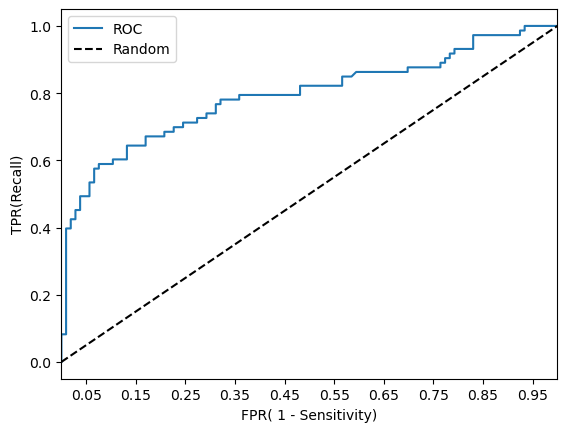

In [35]:
def roc_curve_plot(y_test, pred_proba_c1):
  #임계값에 따른 FPR, TPR값을 반환받음.
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

  #ROC Curve를 plot곡선으로 그림
  plt.plot(fprs, tprs, label='ROC')
  #가운데 대각선 직선을 그림.
  plt.plot([0,1], [0,1], 'k--', label='Random')

  #FPR X축의 스케일을 0.1단위로 변경, X,Y축 명 설정등
  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))
  plt.xlim(0,1)
  plt.xlabel('FPR( 1 - Sensitivity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()
  plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [36]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC값 : {roc_score:.4f}')

ROC AUC값 : 0.7932


In [51]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC_AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, f1스코어 :{f1:.4f}, AUC : {roc_auc:.4f}')


get_clf_eval(y_test, pred, pred_proba[:, 1].reshape(-1, 1))

오차행렬
[[81 25]
 [22 51]]
정확도 : 0.7374, 정밀도 : 0.6711, 재현율 : 0.6986, f1스코어 :0.6846, AUC : 0.7932
